In [1]:
# Import useful libraries
import numpy as np
from ci_test import ci_test
from scipy.io import loadmat
import networkx as nx
from itertools import chain, combinations, permutations
from helpers import *
from sklearn.metrics import f1_score, accuracy_score
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

In [2]:
# Importing data to use for cross validation (500 * 5)
validation_data = loadmat('data2.mat')['D2']

In [3]:
G, MBs_dict = build_moralized_graph(validation_data, alpha = 0.01)

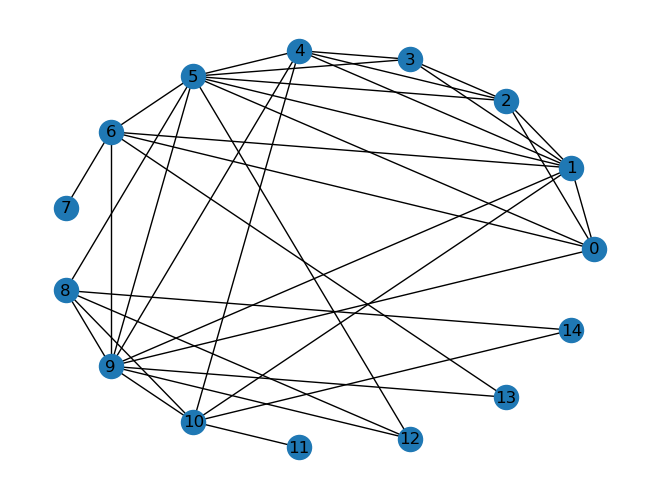

In [4]:
nx.draw_circular(G, with_labels=True)

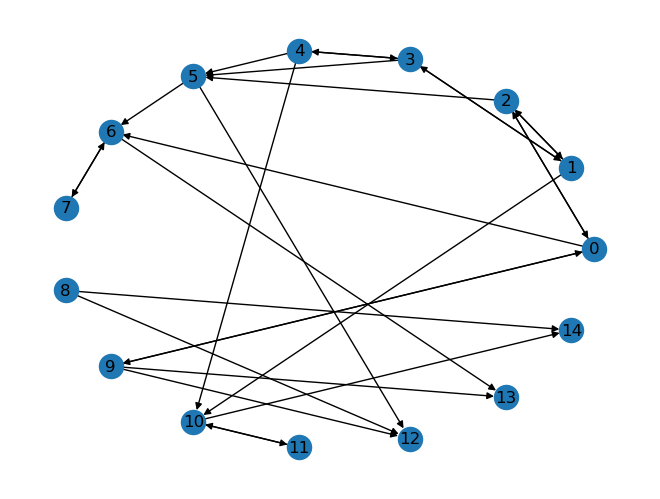

In [5]:
new_G = second_step_GS(G,validation_data, 0.01, MBs_dict)
nx.draw_circular(new_G, with_labels = True)

Applying Meek's rules

In [6]:
final = meek_orientation(G, validation_data, 0.01)

Final graph is ready!!


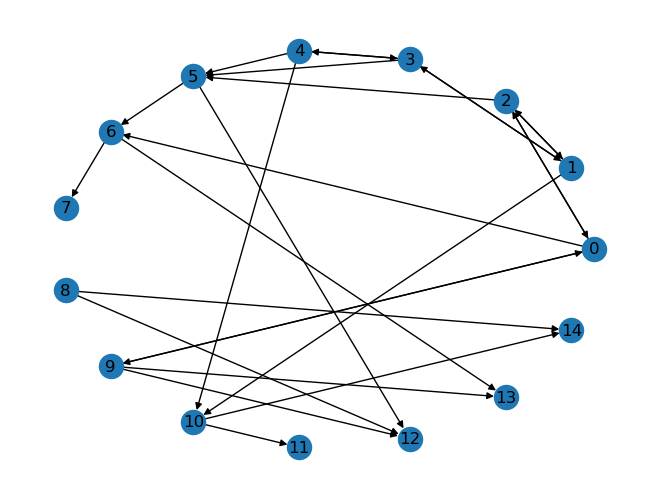

In [7]:
nx.draw_circular(final, with_labels = True)

Comparing with the ground truth

In [8]:
A_true = loadmat('data2.mat')['A2']

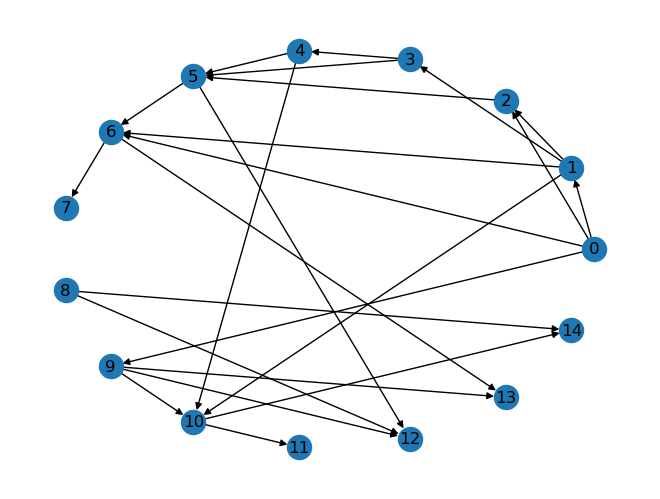

In [9]:
G_true = nx.from_numpy_array(A_true, create_using=nx.DiGraph())
nx.draw_circular(G_true, with_labels=True)

In [10]:
A = nx.adjacency_matrix(final)

In [11]:
f1_score(A_true.flatten(), A.toarray().flatten())

0.8400000000000001

In [12]:
accuracy_score(A_true.flatten(), A.toarray().flatten())

0.9644444444444444